In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datasets import Dataset

In [ ]:

dataset = Dataset.from_file("./data/meta-math___meta_math_qa/meta_math_qa-train.arrow")
print(dataset[0])

{'type': 'MATH_AnsAug', 'query': "Gracie and Joe are choosing numbers on the complex plane. Joe chooses the point $1+2i$. Gracie chooses $-1+i$. How far apart are Gracie and Joe's points?", 'original_question': "Gracie and Joe are choosing numbers on the complex plane. Joe chooses the point $1+2i$. Gracie chooses $-1+i$. How far apart are Gracie and Joe's points?", 'response': "The distance between two points $(x_1,y_1)$ and $(x_2,y_2)$ in the complex plane is given by the formula $\\sqrt{(x_2-x_1)^2+(y_2-y_1)^2}$.\nIn this case, Joe's point is $(1,2)$ and Gracie's point is $(-1,1)$.\nSo the distance between their points is $\\sqrt{((-1)-(1))^2+((1)-(2))^2}=\\sqrt{(-2)^2+(-1)^2}=\\sqrt{4+1}=\\sqrt{5}$.\nTherefore, Gracie and Joe's points are $\\boxed{\\sqrt{5}}$ units apart.\nThe answer is: \\sqrt{5}"}


In [ ]:
# Số lượng mẫu
print(f"Số lượng mẫu: {len(dataset)}")

# Tên các cột
print(f"Các cột: {dataset.column_names}")

# Hiển thị 3 dòng đầu
print(dataset[:3])


Số lượng mẫu: 395000
Các cột: ['type', 'query', 'original_question', 'response']
{'type': ['MATH_AnsAug', 'GSM_Rephrased', 'GSM_SV'], 'query': ["Gracie and Joe are choosing numbers on the complex plane. Joe chooses the point $1+2i$. Gracie chooses $-1+i$. How far apart are Gracie and Joe's points?", 'What is the total cost of purchasing equipment for all sixteen players on the football team, considering that each player requires a $25 jersey, a $15.20 pair of shorts, and a pair of socks priced at $6.80?', "Diego baked 12 cakes for his sister's birthday. Donald also baked 4 cakes, but ate x while waiting for the party to start. There are 15 cakes left. What is the value of unknown variable x?"], 'original_question': ["Gracie and Joe are choosing numbers on the complex plane. Joe chooses the point $1+2i$. Gracie chooses $-1+i$. How far apart are Gracie and Joe's points?", 'The treasurer of a football team must buy equipment for the sixteen players of his team. Each piece of equipment con

In [21]:
from random import choice

type_set = set(dataset["type"])

for t in type_set:
    sample = next(x for x in dataset if x["type"] == t)
    print(f"=== Type: {t} ===")
    print("Query:", sample["query"])
    print("Response:", sample["response"])
    print()

=== Type: MATH_FOBAR ===
Query: What is $ 6 \div X - 2 - 8 + 2 \cdot 8$?
If we know the answer to the above question is 8, what is the value of unknown variable X?
Response: We want to find the value of $X$ in the given equation.
The equation is:
$6 \div X - 2 - 8 + 2 \cdot 8$
To find the value of $X$, we can simplify the equation using the order of operations (PEMDAS/BODMAS).
First, we need to perform the multiplication:
$2 \cdot 8 = 16$
Next, we can perform the division:
$6 \div X = \frac{6}{X}$
Now, we can substitute the simplified values back into the equation:
$\frac{6}{X} - 2 - 8 + 16$
Next, we can simplify the addition and subtraction:
$\frac{6}{X} - 2 - 8 + 16 = \frac{6}{X} + 6$
Given that the value of the equation is 8, we can write:
$\frac{6}{X} + 6 = 8$
To solve for $X$, we can start by subtracting 6 from both sides of the equation:
$\frac{6}{X} = 2$
Now, we can multiply both sides of the equation by $X$ to eliminate the fraction:
$6 = 2X$
Dividing both sides of the equation

In [22]:
# Tìm mẫu có độ dài response lớn nhất
max_len = 0
max_example = None

for example in dataset:
    resp_len = len(example['response'])
    if resp_len > max_len:
        max_len = resp_len
        max_example = example

# In ra kết quả
print("=== Loại bài toán có lời giải dài nhất ===")
print(f"Type: {max_example['type']}")
print(f"Độ dài response: {max_len} ký tự\n")
print("Query:")
print(max_example['query'])
print("\nResponse:")
print(max_example['response'])


=== Loại bài toán có lời giải dài nhất ===
Type: MATH_Rephrased
Độ dài response: 5367 ký tự

Query:
The equations $75x^4 + ax^3 + bx^2 + cx + 12 = 0$ and $12x^5 + dx^4 + ex^3 + fx^2 + gx + 75 = 0$ have a common rational root $k$, which is negative and not an integer. What is the value of $k$?

Response:
By the Rational Root Theorem, $k$ must be a divisor of both 12 and 75.
Since $k$ is negative and not an integer, the only possible values for $k$ are $-\frac{1}{2}$ and $-\frac{1}{3}$.
We can substitute these values into the equations and check if they satisfy both equations.
For $k=-\frac{1}{2}$, the first equation becomes $75\left(-\frac{1}{2}\right)^4 + a\left(-\frac{1}{2}\right)^3 + b\left(-\frac{1}{2}\right)^2 + c\left(-\frac{1}{2}\right) + 12 = 0$, which simplifies to $-\frac{75}{16}+\frac{a}{8}-\frac{b}{4}+\frac{c}{2}+12=0$.
Similarly, for $k=-\frac{1}{3}$, the first equation becomes $75\left(-\frac{1}{3}\right)^4 + a\left(-\frac{1}{3}\right)^3 + b\left(-\frac{1}{3}\right)^2 + c\

>>> CÂU HỎI:
Min: 0, Max: 289, Mean: 40.45, Median: 38.0, Std: 21.67
>>> LỜI GIẢI:
Min: 3, Max: 1010, Mean: 101.19, Median: 86.0, Std: 59.33


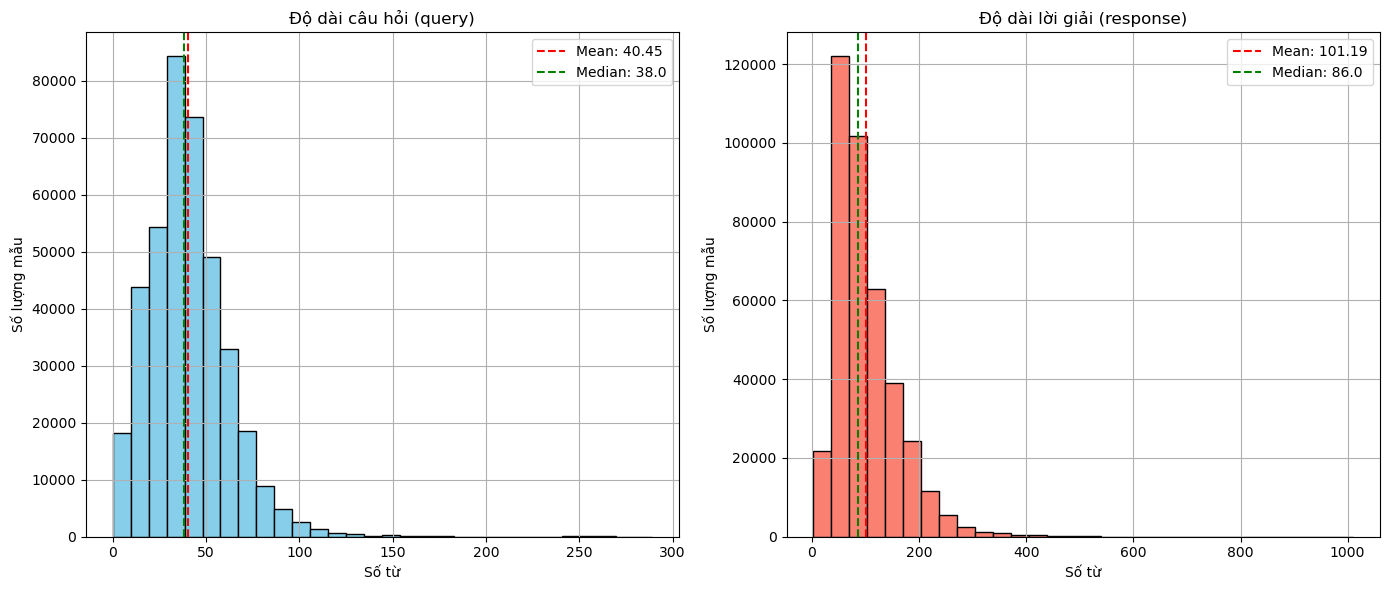

In [28]:
import matplotlib.pyplot as plt
import numpy as np

# Tính độ dài câu hỏi và lời giải
query_lengths = [len(example['query'].split()) for example in dataset]
response_lengths = [len(example['response'].split()) for example in dataset]

# ===== Thống kê câu hỏi =====
q_min = np.min(query_lengths)
q_max = np.max(query_lengths)
q_mean = np.mean(query_lengths)
q_median = np.median(query_lengths)
q_std = np.std(query_lengths)

# ===== Thống kê lời giải =====
r_min = np.min(response_lengths)
r_max = np.max(response_lengths)
r_mean = np.mean(response_lengths)
r_median = np.median(response_lengths)
r_std = np.std(response_lengths)

# ===== In thống kê =====
print(">>> CÂU HỎI:")
print(f"Min: {q_min}, Max: {q_max}, Mean: {q_mean:.2f}, Median: {q_median}, Std: {q_std:.2f}")
print(">>> LỜI GIẢI:")
print(f"Min: {r_min}, Max: {r_max}, Mean: {r_mean:.2f}, Median: {r_median}, Std: {r_std:.2f}")

# ===== Vẽ biểu đồ so sánh =====
plt.figure(figsize=(14,6))

# Câu hỏi
plt.subplot(1,2,1)
plt.hist(query_lengths, bins=30, color='skyblue', edgecolor='black')
plt.axvline(q_mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {q_mean:.2f}')
plt.axvline(q_median, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {q_median}')
plt.title("Độ dài câu hỏi (query)")
plt.xlabel("Số từ"); plt.ylabel("Số lượng mẫu")
plt.legend()
plt.grid(True)

# Lời giải
plt.subplot(1,2,2)
plt.hist(response_lengths, bins=30, color='salmon', edgecolor='black')
plt.axvline(r_mean, color='red', linestyle='dashed', linewidth=1.5, label=f'Mean: {r_mean:.2f}')
plt.axvline(r_median, color='green', linestyle='dashed', linewidth=1.5, label=f'Median: {r_median}')
plt.title("Độ dài lời giải (response)")
plt.xlabel("Số từ"); plt.ylabel("Số lượng mẫu")
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()


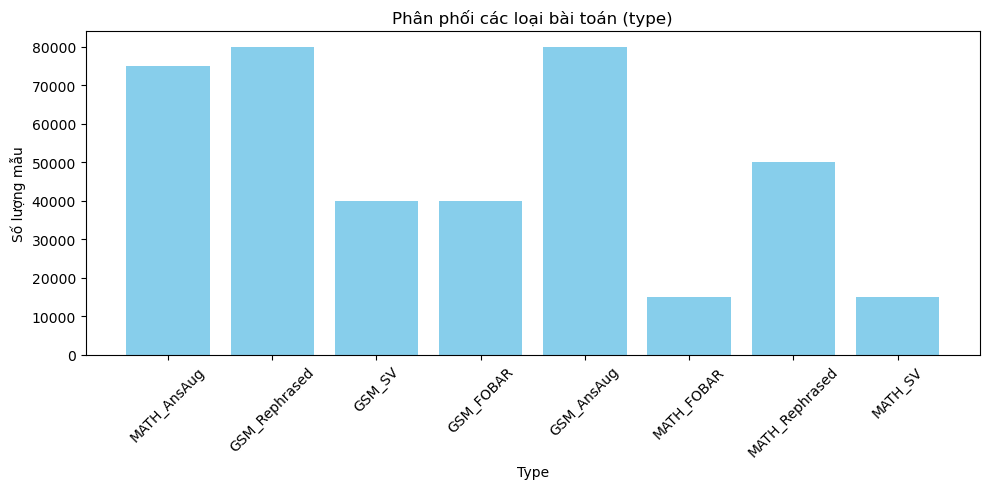

In [19]:
import matplotlib.pyplot as plt
from collections import Counter

# Đếm số lượng mỗi loại bài toán
type_counts = Counter(dataset['type'])

# Vẽ biểu đồ
plt.figure(figsize=(10, 5))
plt.bar(type_counts.keys(), type_counts.values(), color='skyblue')
plt.xticks(rotation=45)
plt.title('Phân phối các loại bài toán (type)')
plt.xlabel('Type')
plt.ylabel('Số lượng mẫu')
plt.tight_layout()
plt.show()


C:\Users\HP\AppData\Local\Temp\ipykernel_17404\1427964954.py:15: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=list(avg_len_per_type.keys()), y=list(avg_len_per_type.values()), palette="magma")


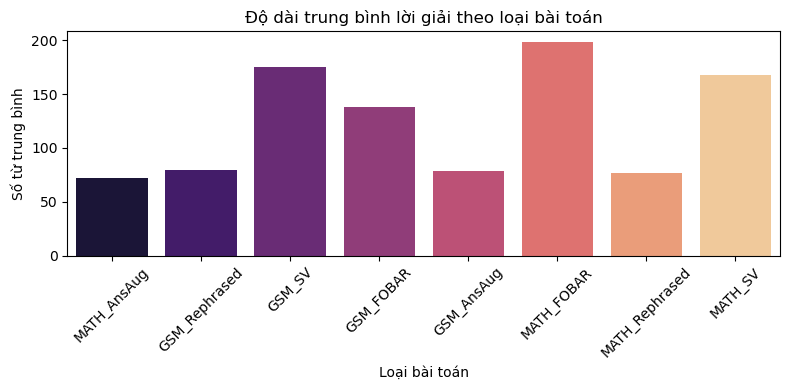

In [29]:
from collections import defaultdict

response_len_by_type = defaultdict(list)

for example in dataset:
    t = example['type']
    l = len(example['response'].split())
    response_len_by_type[t].append(l)

# Tính độ dài trung bình
avg_len_per_type = {t: sum(lens)/len(lens) for t, lens in response_len_by_type.items()}

# Vẽ biểu đồ
plt.figure(figsize=(8,4))
sns.barplot(x=list(avg_len_per_type.keys()), y=list(avg_len_per_type.values()), palette="magma")
plt.title("Độ dài trung bình lời giải theo loại bài toán")
plt.ylabel("Số từ trung bình"); plt.xlabel("Loại bài toán")
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()
